# Logistic Regression

## The classification  goal is to predict whether the client will subscribe to a term deposit? WIth the features are job, marital status, education, default, housing loan, personal loan, and previous outcome result.

## Preparing package and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

%matplotlib inline

In [2]:
data = pd.read_csv('F:/Learn Python/Data/banking.csv')
data = data.dropna()

In [3]:
# list the columns from dataset 

print(list(data.columns))

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [4]:
data.head(7)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
5,30,management,divorced,basic.4y,no,yes,no,cellular,jul,tue,...,8,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
6,37,blue-collar,married,basic.4y,no,yes,no,cellular,may,thu,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,0


In [5]:
print(data.shape)

(41188, 21)


In [6]:
# Check the type for all columns in a dataframe
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [7]:
print(data['job'].unique())

['blue-collar' 'technician' 'management' 'services' 'retired' 'admin.'
 'housemaid' 'unemployed' 'entrepreneur' 'self-employed' 'unknown'
 'student']


In [8]:
print(data['marital'].unique())

['married' 'single' 'divorced' 'unknown']


In [9]:
print(data['education'].unique())

['basic.4y' 'unknown' 'university.degree' 'high.school' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate']


In [10]:
print(data['default'].unique())

['unknown' 'no' 'yes']


In [11]:
print(data['housing'].unique())

['yes' 'no' 'unknown']


In [12]:
print(data['loan'].unique())

['no' 'yes' 'unknown']


In [13]:
print(data['contact'].unique())

['cellular' 'telephone']


In [14]:
# group basic.4y, basic.6y, basic.9y into basic

data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

In [15]:
print(data['education'].unique())

['Basic' 'unknown' 'university.degree' 'high.school' 'professional.course'
 'illiterate']


## Exploratory Data

In [16]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

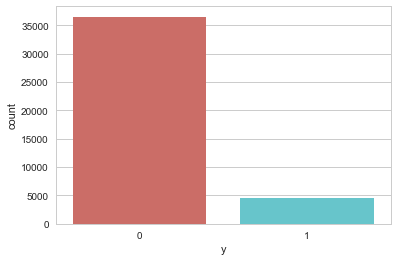

In [17]:
sns.countplot(x='y', data = data, palette ='hls')
plt.show()

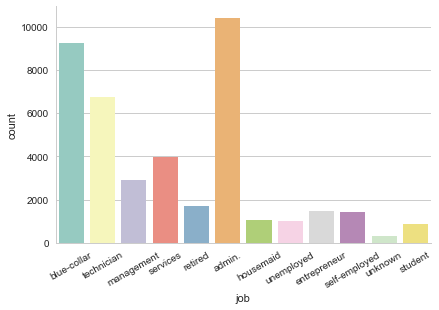

In [18]:
sns.factorplot('job', data = data, aspect = 1.5, kind = 'count', palette = 'Set3').set_xticklabels(rotation = 30)
plt.show()

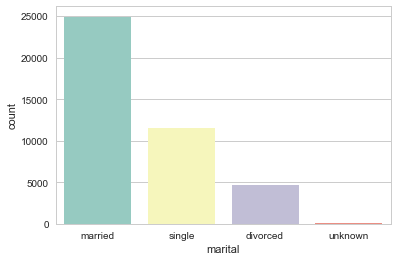

In [19]:
sns.countplot(x='marital', data = data, palette='Set3')
plt.show()

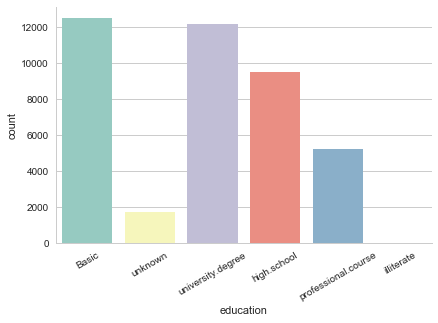

In [20]:
sns.factorplot('education', data = data, aspect = 1.5, kind = 'count', palette = 'Set3').set_xticklabels(rotation = 30)
plt.show()

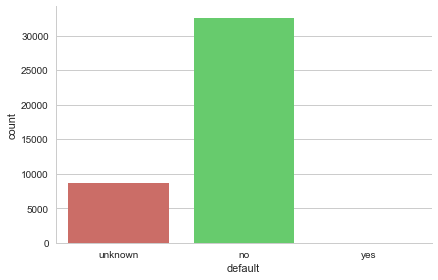

In [21]:
sns.factorplot('default', data = data, aspect = 1.5, kind = 'count', palette = 'hls')
plt.show()

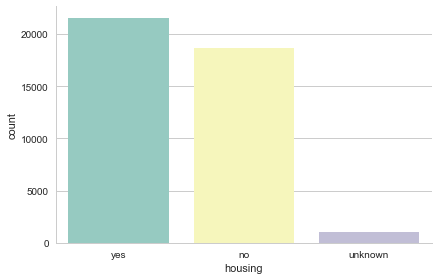

In [22]:
sns.factorplot('housing', data = data, aspect = 1.5, kind = 'count', palette = 'Set3')
plt.show()

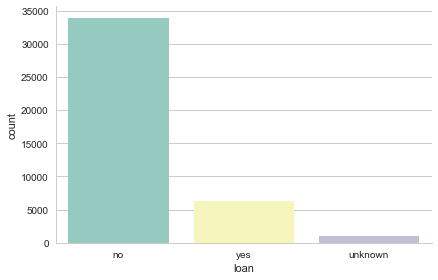

In [23]:
sns.factorplot('loan', data = data, aspect = 1.5, kind = 'count', palette = 'Set3')
plt.show()

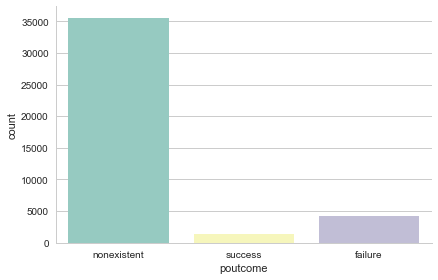

In [24]:
sns.factorplot('poutcome', data = data, aspect = 1.5, kind = 'count', palette = 'Set3')
plt.show()

In [25]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [26]:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [27]:
data.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [28]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


Text(0,0.5,'Frequency of Purchase')

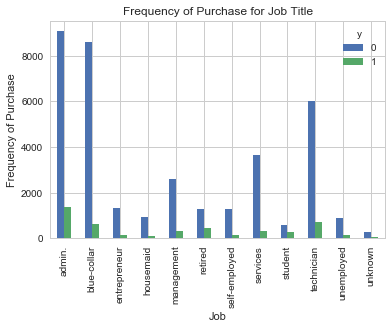

In [29]:

pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Frequency of Purchase for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

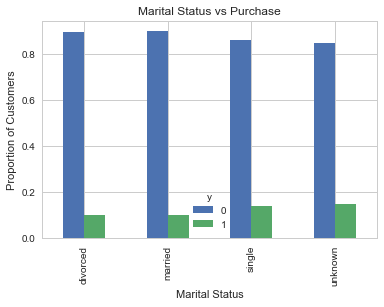

In [30]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False)
plt.title('Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.show()

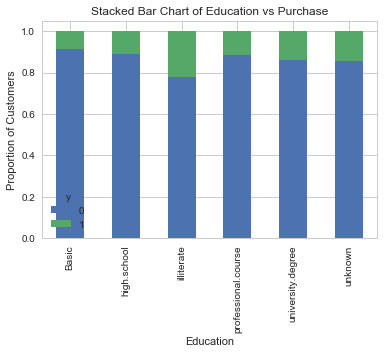

In [31]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.show()

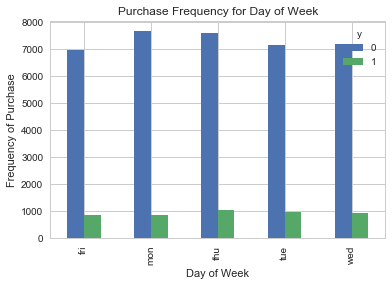

In [32]:
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

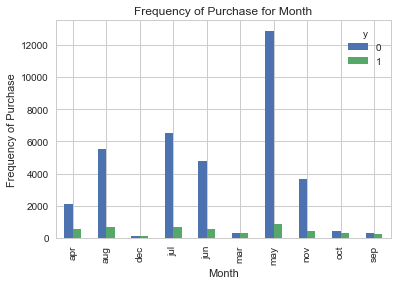

In [33]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Frequency of Purchase for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

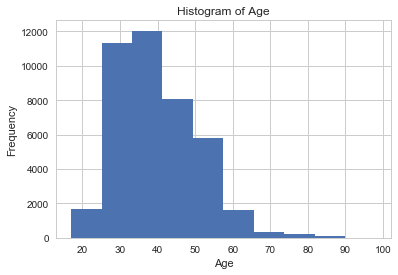

In [34]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

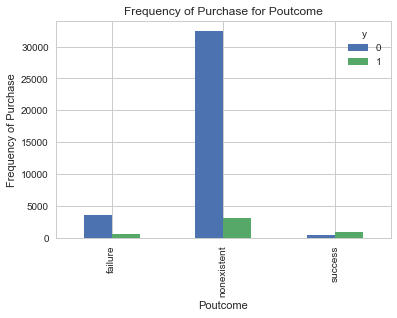

In [35]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Frequency of Purchase for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

## Data Preprocessing

### Drop the features that is not needed for logistic regression analysis

In [36]:
data.drop(data.columns[[0,7,8,9,10,11,12,13,15,16,17,18,19]],axis=1,inplace=True)
list(data.columns)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'y']

### Create dummy variables

In [37]:
data_dum = pd.get_dummies(data, columns=['job','marital','education','default','housing','loan','poutcome'])

In [38]:
list(data_dum.columns)

['y',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_Basic',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'poutcome_failure',
 'poutcome_nonexistent',
 'poutcome_success']

In [39]:
data_dum.drop(data_dum.columns[[12,16,22,24,27,30]], axis =1, inplace =True)
list(data_dum.columns)

['y',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_Basic',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'default_no',
 'default_yes',
 'housing_no',
 'housing_yes',
 'loan_no',
 'loan_yes',
 'poutcome_failure',
 'poutcome_nonexistent',
 'poutcome_success']

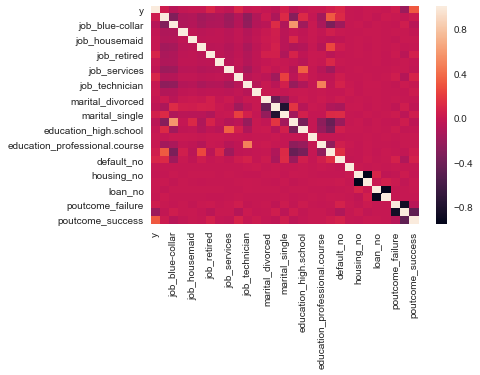

In [40]:
# Describe the correlation among features in dataset

sns.heatmap(data_dum.corr())
plt.show()

In [41]:
# Check the columns with dummies variable

data_dum.head()

,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,education_university.degree,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
2,1,0,0,0,0,1,0,0,0,0,...,1,1,0,0,1,1,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,1,0,0,1,0
4,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,1,0,0,0,1


### Analyzing data with logistic regression

In [42]:
X = data_dum.iloc[:,1:]
y = data_dum.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [43]:
X_train.shape

(28831, 28)

In [44]:
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
y_pred = log_reg.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)

[[10853   128]
 [ 1103   273]]


In [46]:
print('Accuracy of logistic regression on test set: {:.3f}'.format(log_reg.score(X_test, y_test)))

Accuracy of logistic regression on test set: 0.900


In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.91      0.99      0.95     10981
          1       0.68      0.20      0.31      1376

avg / total       0.88      0.90      0.88     12357



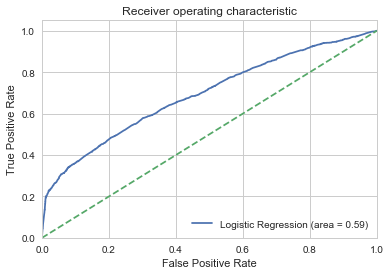

In [48]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
log_roc_auc = roc_auc_score(y_test, log_reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % log_roc_auc)
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()